# Genetic Algorithm Tessellation
In this notebook, we'll use genetic algorithms to create tessellations!

## Setup

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("..") # Move execution to root dir

In [2]:
from datetime import datetime
from enum import Enum, auto
from pathlib import Path
from typing import Callable, Iterator, Optional

import numpy as np
from matplotlib import pyplot as plt 
from leap_ec import ops, probe
from leap_ec.algorithm import generational_ea
from leap_ec.representation import Representation

from tessellation.draw import MPLDrawer
from tessellation.procgen import ALL_ACTIONS, Action, Generator, GenerationResult, TessellationType
from tessellation.procgen.ga.genome import TessellationDecoder
from tessellation.procgen.ga import heuristic
from tessellation.procgen.ga import mutate
from tessellation.procgen.ga.problem import TessellationProblem, initialize_genome

## Configuration

In [3]:
# Proc gen constants
SEED = 32
SIDE_LEN = 100

# Genetic Algorithm config
SIDE_LEN = 100
SUBSTITUTION_PROB, INSERTION_PROB, DELETION_PROB = 0.1, 0.1, 0.1
POP_SIZE = 50
MAX_GENERATIONS = 100
ACTION_PROBS = np.ones(len(Action)) / len(Action)
HEURISTIC_FNS = [
    # lambda phenome:  heuristic.bottom_top_not_even_penalty(phenome, max_diff_before_penalty=20),
    heuristic.duplicated_points_penalty,
    lambda phenome: heuristic.out_of_bounds_penalty(phenome, SIDE_LEN),
    heuristic.count_number_points_reward,
    lambda phenome:  heuristic.bottom_top_even_reward(phenome, max_diff_before_reward=20),
]
FN_WEIGHTS = np.array([1, 0.2, 1, 1])

# Draw config
CMAP = "gray"
drawer = MPLDrawer(CMAP)    

# Save config
SAVE_DIR = Path(f"saved_tessellations/ga/")
SAVE_DIR.mkdir(parents=True, exist_ok=True)

## Genetic Algorithm Tessellation
We'll be using the LEAP package for our genetic algorithms.

In [4]:
from leap_ec.simple import ea_solve

def f(x):
    """A real-valued function to optimized."""
    return sum(x)**2

ea_solve(f, bounds=[(-5.12, 5.12) for _ in range(5)], maximize=True)

step,bsf
0,122.14690464925488
1,195.58630183096508
2,332.94245694926286
3,332.94245694926286
4,332.94245694926286
5,338.62215141050336
6,443.42705313749883
7,443.42705313749883
8,489.4209689196466
9,489.4209689196466
10,563.0968082418757
11,563.0968082418757
12,580.9288120902936
13,619.2985020187355
14,642.391211990899
15,642.391211990899
16,655.3600000000001
17,655.3600000000001
18,655.3600000000001
19,655.3600000000001
20,655.3600000000001
21,655.3600000000001
22,655.3600000000001
23,655.3600000000001
24,655.3600000000001
25,655.3600000000001
26,655.3600000000001
27,655.3600000000001
28,655.3600000000001
29,655.3600000000001
30,655.3600000000001
31,655.3600000000001
32,655.3600000000001
33,655.3600000000001
34,655.3600000000001
35,655.3600000000001
36,655.3600000000001
37,655.3600000000001
38,655.3600000000001
39,655.3600000000001
40,655.3600000000001
41,655.3600000000001
42,655.3600000000001
43,655.3600000000001
44,655.3600000000001
45,655.3600000000001
46,655.3600000000001
47,655.3

array([5.12, 5.12, 5.12, 5.12, 5.12])

### Define Problem and Representation

In [5]:
problem = TessellationProblem(
    heuristic_fns=HEURISTIC_FNS, 
    fn_weights=FN_WEIGHTS, 
    side_len=SIDE_LEN
)

representation = Representation(
    decoder=TessellationDecoder(),
    initialize=lambda: initialize_genome(problem) 
)

### Evolve!

In [6]:
final_pop = generational_ea(
    max_generations=MAX_GENERATIONS, 
    pop_size=POP_SIZE,
    problem=problem,
    representation=representation,

    # The operator pipeline
    pipeline=[
        # Select parents via tournament_selection selection
        ops.tournament_selection,
        
        ops.clone,  # Copy them (just to be safe)
        lambda individual_iterator: mutate.apply_mutation(
            mutate.substitute_action, individual_iterator, fn_kwargs={"action_probs": ACTION_PROBS}
        ),
        lambda individual_iterator: mutate.apply_mutation(
            mutate.insert_action, individual_iterator, fn_kwargs={"action_probs": ACTION_PROBS}
        ),
        lambda individual_iterator: mutate.apply_mutation(mutate.delete_action, individual_iterator),
        
        # Crossover with a 40% chance of swapping each gene
        # ops.UniformCrossover(p_swap=0.4),
        
        ops.evaluate,  # Evaluate fitness
        
        # Collect offspring into a new population
        ops.pool(size=POP_SIZE),
        
        probe.BestSoFarProbe()  # Print the BSF
    ]
)

step,bsf
0,110.0
1,118.0
2,119.0
3,119.0
4,126.0
5,126.0
6,126.0
7,127.0
8,127.0
9,129.0
10,134.0
11,134.0
12,146.0
13,146.0
14,150.0
15,150.0
16,150.0
17,150.0
18,151.0
19,152.0
20,156.0
21,158.0
22,168.0
23,168.0
24,168.0
25,168.0
26,168.0
27,174.0
28,174.0
29,174.0
30,174.0
31,174.0
32,174.0
33,174.0
34,174.0
35,174.0
36,174.0
37,174.0
38,174.0
39,174.0
40,174.0
41,174.0
42,174.0
43,174.0
44,174.0
45,174.0
46,174.0
47,174.0
48,174.0
49,174.0
50,174.0
51,174.0
52,174.0
53,174.0
54,174.0
55,174.0
56,176.0
57,176.0
58,176.0
59,176.0
60,179.0
61,179.0
62,179.0
63,179.0
64,179.0
65,179.0
66,179.0
67,179.0
68,179.0
69,179.0
70,179.0
71,179.0
72,179.0
73,179.0
74,180.0
75,180.0
76,180.0
77,180.0
78,180.0
79,180.0
80,180.0
81,180.0
82,180.0
83,180.0
84,180.0
85,180.0
86,180.0
87,180.0
88,180.0
89,180.0
90,180.0
91,180.0
92,180.0
93,180.0
94,180.0
95,183.0
96,183.0
97,183.0
98,183.0
99,186.0


## Evaluate

In [16]:
def examine_individual(individual):
    genome = individual.genome
    phenome = decoder.decode(genome)
    print(f"Individual: {idx}; Fitness: {problem.evaluate(phenome)}")
    mask = np.zeros((SIDE_LEN, SIDE_LEN), dtype=int)
    mask = Generator._draw_line(mask, genome.start_point, genome.actions)
    mask_T = Generator._draw_line(mask.T, genome.start_point, genome.actions)
    final_mask = mask | mask_T
    
    gen_result = GenerationResult(final_mask, TessellationType.SQUARE_TRANSLATION)
    tessellation = Generator.tessellate(gen_result)
    
    drawing = drawer.draw(tessellation)
    if show:
        plt.show()
        print("Press 's' to save, 'q' to quit, or 'enter' to continue...")
        while True:   
            user_action = input()
            if not user_action:
                break
        
            elif user_action.lower() == "s":
                print("Provide a name for the tessellation, or click 'enter' to use timestamp as name...")
                save_name = input()
                if not save_name:
                    save_name = f"{datetime.today().isoformat()}"
    
                gen_result.save_as_json(SAVE_DIR / f"{save_name}.json")
                drawer.save_as_png(SAVE_DIR / f"{save_name}.png", tessellation)
                break
            elif user_action.lower() == "q":
                raise KeyboardInterrupt
    clear_output()

Individual: 24; Fitness: 152.0


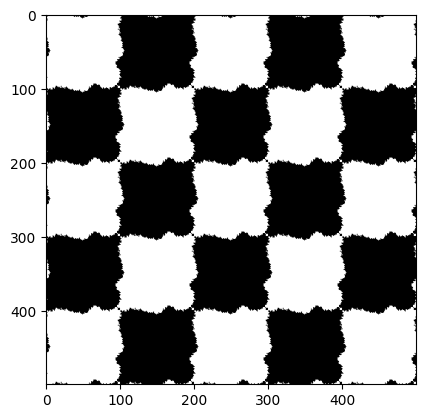

Press 's' to save, 'q' to quit, or 'enter' to continue...


 q


KeyboardInterrupt: 

In [17]:
from IPython.display import clear_output

decoder = TessellationDecoder()
show = True
for idx, individual in enumerate(final_pop):
    examine_individual(individual)